# Small AI Project

In [2]:
import numpy as np # scientific computing
import matplotlib.pyplot as plt
import pandas as pd

In [135]:
x = np.arange(-50, 50, 0.1) # input variable / independent variable / features /
f = np.sin(x) # f(x)
y = f + np.random.normal(0, 0.5, size=len(y)) # add Gaussian noise with mean = 0 and std = 1
list(zip(x, y))

[(-50.0, -0.12717510689782036),
 (-49.9, 0.9018881173338273),
 (-49.8, 1.0809277120969587),
 (-49.699999999999996, 0.1444607386742613),
 (-49.599999999999994, -0.6465494862441648),
 (-49.49999999999999, 1.0147889720643033),
 (-49.39999999999999, 1.5353455081289342),
 (-49.29999999999999, 0.8254069016252944),
 (-49.19999999999999, 0.8332224992330157),
 (-49.09999999999999, 1.3956426907413155),
 (-48.999999999999986, 1.0178924559836957),
 (-48.899999999999984, 0.6632255986236826),
 (-48.79999999999998, 0.6874616294004408),
 (-48.69999999999998, 0.9847919679634051),
 (-48.59999999999998, 1.0659034595332604),
 (-48.49999999999998, 0.3183190251632738),
 (-48.39999999999998, 0.3473577938949153),
 (-48.299999999999976, 0.5386275057591743),
 (-48.199999999999974, 0.2708442769219407),
 (-48.09999999999997, 1.4360006329250883),
 (-47.99999999999997, 0.30617251363411946),
 (-47.89999999999997, 0.10505895765960838),
 (-47.79999999999997, 0.05172612141313748),
 (-47.69999999999997, -0.1695770907977

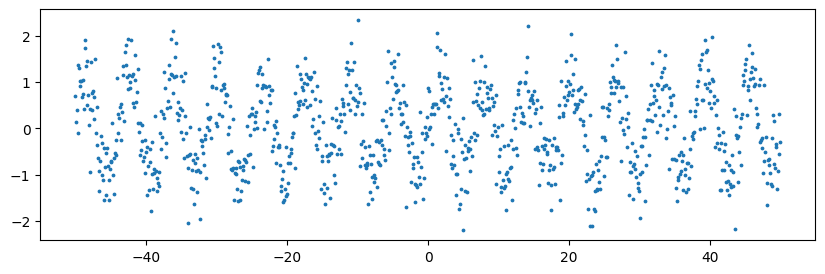

In [4]:
plt.figure(figsize=(10, 3))
plt.scatter(x, y, s=3)

In statistical learning, in this case supervised learning $X -> Y$ 
* you assume that your n datapoints: $\{x_i, y_i\}_{i=1}^{n}$
* you assume that these data came from a real world "generative process" and it follows this form: $Y = f(X) + \epsilon$ where $\epsilon$ is independent noise
* now our goal is to find a function $\hat{f} \approx f$ using dataset, where $\hat{f}$ is our model

In [5]:
# let's first define our neural network
# that takes in x and outputs y

In [6]:
# https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
import torch # torch is like numpy but spec. for neural networks
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

/home/prince/anaconda3/envs/rl/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/prince/anaconda3/envs/rl/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [123]:
# Get cpu, gpu or mps device for training.
device = "cuda" # we are using cuda in nVidia GPU

import torch.nn as nn
import torch.nn.functional as F

# Define model
class NeuralNetwork(nn.Module):  # nn.Module is boilerplate / template that we inherit
    def __init__(self):
        super().__init__()

        # define architecture, Sequential is the order of "layers" - sets of neurons and operations
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 256),
            nn.BatchNorm1d(256),  # Batch normalization after first linear layer
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),    # Batch normalization after second linear layer
            nn.ReLU(),            
            nn.Linear(256, 1),
            nn.BatchNorm1d(1),    # Batch normalization after second linear layer            
            # nn.Tanh(),
        )

        # Apply Kaiming He initialization
        self._initialize_weights()

    def forward(self, x):
        y_hat = self.linear_relu_stack(x)
        y_hat = nn.functional.tanh(y_hat)
        return y_hat

    def _initialize_weights(self):
        for layer in self.modules():
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')  # Kaiming He initialization for ReLU layers
                if layer.bias is not None:
                    nn.init.constant_(layer.bias, 0)  # Initialize bias to zero

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=1, bias=True)
    (7): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)


In [124]:
x = np.float32(x)
y = np.float32(y)

In [125]:
x.shape, y.shape

((1000,), (1000,))

In [126]:
# Pytorch expects the shape/dimensions to be N x F
# N - number of data / batch of data fed
# F - feature size

# For images, Pytorch expects N x C x H x W
# N - number of data / batch of data fed
# C - channels, e.g. RGB = 3
# H - height
# W - width

# Make sure the datapoints follow these conventions!

In [127]:
x_tensor = torch.tensor(np.float32(x)).to(device)
x_tensor = x_tensor.unsqueeze(1)

y_tensor = torch.tensor(np.float32(y)).to(device)
y_tensor = y_tensor.unsqueeze(1)

torch.Size([1000, 1])


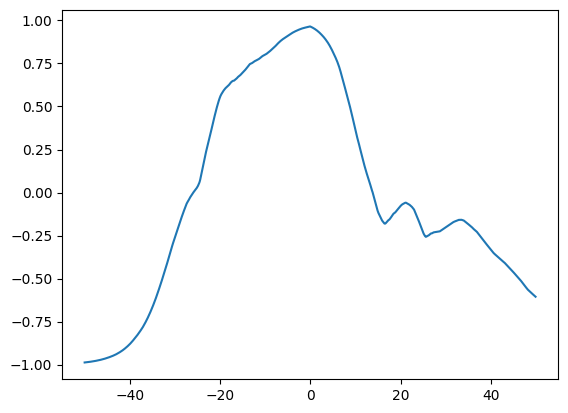

In [128]:
print(x_tensor.shape)
y_hat = model(x_tensor)
y_hat = y_hat.detach().cpu().numpy().flatten() # convert from tensor in GPU to numpy array in CPU memory
plt.plot(x, y_hat)

In [129]:
# mean square error
np.mean((y_hat - y)**2)

1.1760235

In [130]:
# lets train the model
# define loss function
loss_fn = nn.MSELoss() # mean squared error for regression, 
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [131]:
def train(model, loss_fn, optimizer):
    model.train() # we say that we are in training mode

    # Compute prediction error
    pred = model(x_tensor) # forward pass -- when prediction happens X -> Y_hat
    loss = loss_fn(pred, y_tensor) # calculate the loss / error ERROR(Y_hat, Y)

    # Backpropagation
    loss.backward() # backward pass, calculate the "error contribution" of each weight
    optimizer.step() # update the weight to reduce the error contribution
    optimizer.zero_grad() # reset the "gradients" -- "error contribution"

    print(f"loss: {loss:>7f}")

In [141]:
# lets train
epochs = 50000 # how many passes in the entire dataset
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(model, loss_fn, optimizer)
print("Done!")

Epoch 1
-------------------------------
loss: 0.477149
Epoch 2
-------------------------------
loss: 0.868713
Epoch 3
-------------------------------
loss: 0.968445
Epoch 4
-------------------------------
loss: 1.002780
Epoch 5
-------------------------------
loss: 1.018757
Epoch 6
-------------------------------
loss: 1.027006
Epoch 7
-------------------------------
loss: 1.031374
Epoch 8
-------------------------------
loss: 1.033522
Epoch 9
-------------------------------
loss: 1.034290
Epoch 10
-------------------------------
loss: 1.034159
Epoch 11
-------------------------------
loss: 1.033421
Epoch 12
-------------------------------
loss: 1.032253
Epoch 13
-------------------------------
loss: 1.030769
Epoch 14
-------------------------------
loss: 1.029026
Epoch 15
-------------------------------
loss: 1.027149
Epoch 16
-------------------------------
loss: 1.025166
Epoch 17
-------------------------------
loss: 1.023020
Epoch 18
-------------------------------
loss: 1.020764
E

Epoch 4830
-------------------------------
loss: 0.449993
Epoch 4831
-------------------------------
loss: 0.454312
Epoch 4832
-------------------------------
loss: 0.449453
Epoch 4833
-------------------------------
loss: 0.454663
Epoch 4834
-------------------------------
loss: 0.449683
Epoch 4835
-------------------------------
loss: 0.454299
Epoch 4836
-------------------------------
loss: 0.449553
Epoch 4837
-------------------------------
loss: 0.454619
Epoch 4838
-------------------------------
loss: 0.449722
Epoch 4839
-------------------------------
loss: 0.454433
Epoch 4840
-------------------------------
loss: 0.449655
Epoch 4841
-------------------------------
loss: 0.454562
Epoch 4842
-------------------------------
loss: 0.449671
Epoch 4843
-------------------------------
loss: 0.454560
Epoch 4844
-------------------------------
loss: 0.449796
Epoch 4845
-------------------------------
loss: 0.454472
Epoch 4846
-------------------------------
loss: 0.449579
Epoch 4847
---

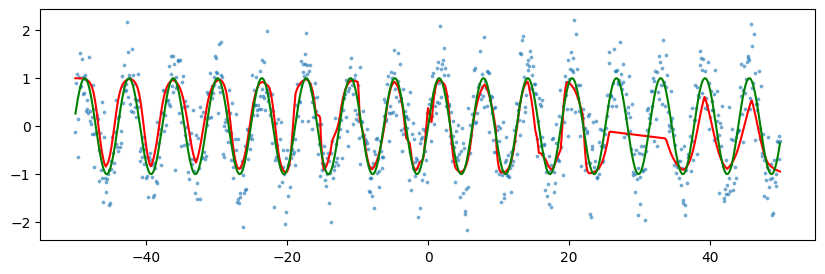

In [142]:
model.eval() # make sure in evaluation mode!!
y_hat = model(x_tensor)
y_hat = y_hat.detach().cpu().numpy().flatten() # convert from tensor in GPU to numpy array in CPU memory

plt.figure(figsize=(10, 3))
plt.plot(x, y_hat, c='r')
plt.scatter(x, y, s=3, alpha=0.5)
plt.plot(x, f, 'green')